In [36]:
import pandas as pd

# 데이터셋 불러오기
df = pd.read_json('')  # 데이터 파일 경로를 지정하세요

# 데이터의 기본 정보 확인
print("데이터셋의 기본 정보:")
print(df.info())

print("\n데이터셋의 첫 5행:")
print(df.head())

print("\n각 컬럼의 결측치 개수:")
print(df.isnull().sum())


데이터셋의 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      605 non-null    object
 1   input   605 non-null    object
 2   output  605 non-null    object
dtypes: object(3)
memory usage: 14.3+ KB
None

데이터셋의 첫 5행:
                                  id  \
0  nikluge-2024-대화 맥락 추론-test-000001   
1  nikluge-2024-대화 맥락 추론-test-000002   
2  nikluge-2024-대화 맥락 추론-test-000003   
3  nikluge-2024-대화 맥락 추론-test-000004   
4  nikluge-2024-대화 맥락 추론-test-000005   

                                               input output  
0  {'conversation': [{'speaker': 1, 'utterance': ...         
1  {'conversation': [{'speaker': 1, 'utterance': ...         
2  {'conversation': [{'speaker': 1, 'utterance': ...         
3  {'conversation': [{'speaker': 1, 'utterance': ...         
4  {'conversation': [{'speaker': 1, 'utterance': ...         

각 컬럼의 결측치 개수:
id        0
inpu


발화의 길이 분포:
count    605.000000
mean      21.137190
std        5.005893
min       11.000000
25%       17.000000
50%       21.000000
75%       25.000000
max       30.000000
Name: utterance_length, dtype: float64


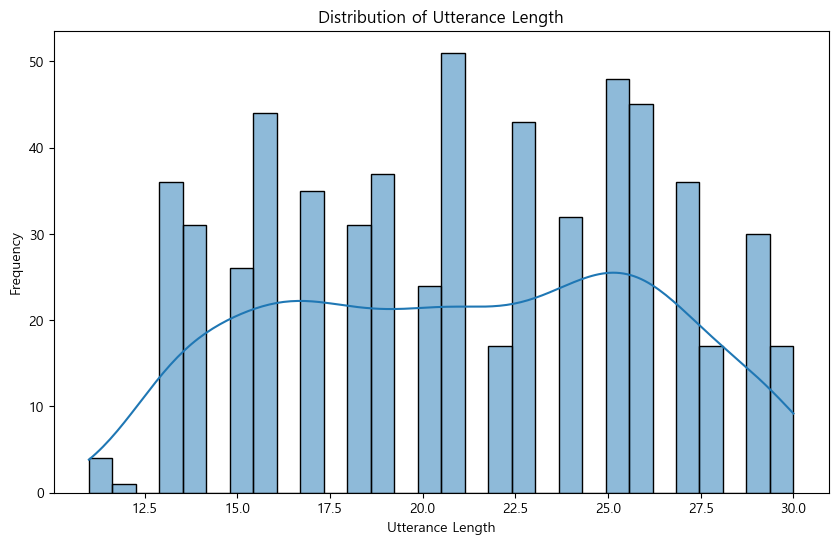

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# 발화 길이 계산
df['utterance_length'] = df['input'].apply(lambda x: len(x['conversation']))

print("\n발화의 길이 분포:")
print(df['utterance_length'].describe())

# 발화 길이의 히스토그램 시각화 및 저장
plt.figure(figsize=(10, 6))
sns.histplot(df['utterance_length'], kde=True, bins=30)
plt.title('Distribution of Utterance Length')
plt.xlabel('Utterance Length')
plt.ylabel('Frequency')
plt.savefig('train_utterance_length_distribution.png')
plt.show()


In [38]:
import matplotlib.font_manager as fm
# 한글 폰트 설정
font_path = ''  # 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 설정



카테고리별 데이터 개수:
category
후행사건    133
동기      124
원인      117
반응      116
전제      115
Name: count, dtype: int64


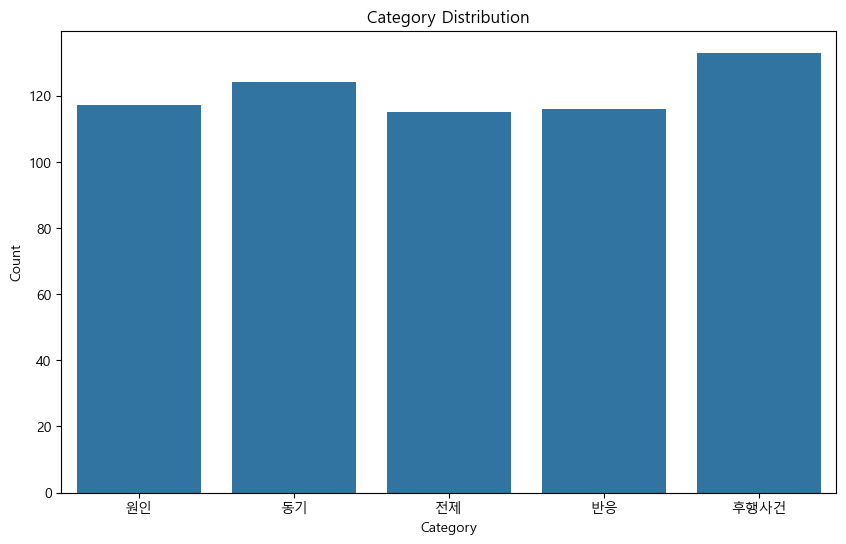

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

df['category'] = df['input'].apply(lambda x: x.get('category', 'Unknown'))
# 카테고리별 데이터 분포 확인
print("\n카테고리별 데이터 개수:")
print(df['category'].value_counts())

# 카테고리 분포 시각화 및 저장
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.savefig('test_category_distribution.png')
plt.show()


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# 추론 컬럼 목록 생성
inference_columns = [col for col in df.columns if col.startswith('inference')]

# 각 추론 컬럼의 값 분포 확인 및 시각화 및 저장
for col in inference_columns:
    print(f"\n{col}의 값 분포:")
    print(df[col].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel('Inference')
    plt.savefig(f'{col}_distribution.png')
    plt.show()


In [41]:
# Reference ID에 따른 분포 확인
print("\nReference ID에 따른 분포:")
print(df['input'].apply(lambda x: x['reference_id']).explode().value_counts())



Reference ID에 따른 분포:
input
MDRW2100000558.1.5     5
MDRW2100008611.1.7     5
MDRW2100014521.1.2     5
MDRW2100038570.1.21    5
MDRW2100020988.1.14    5
                      ..
MDRW2100020071.1.18    1
MDRW2100026063.1.9     1
MDRW2100026063.1.10    1
MDRW2100037330.1.18    1
MDRW2100007293.1.16    1
Name: count, Length: 292, dtype: int64


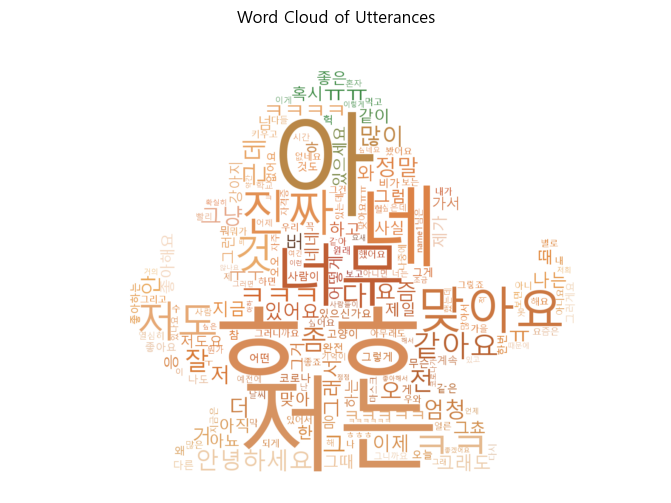

In [42]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# 모든 발화 내용 합치기
all_text = ' '.join(df['input'].apply(lambda x: ' '.join([str(utter['utterance']) for utter in x['conversation']])))
font_path = ''

mask_image = np.array(Image.open(''))  # 마스크 이미지 파일 경로

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False ,font_path=font_path, mask=mask_image).generate(all_text)

image_colors = ImageColorGenerator(mask_image)

# 워드클라우드 시각화 및 저장
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Utterances')
plt.savefig('test_utterance_wordcloud.png')
plt.show()



발화의 단어 수 분포:
count    605.000000
mean      93.115702
std       36.909364
min       14.000000
25%       66.000000
50%       85.000000
75%      116.000000
max      277.000000
Name: total_word_count, dtype: float64


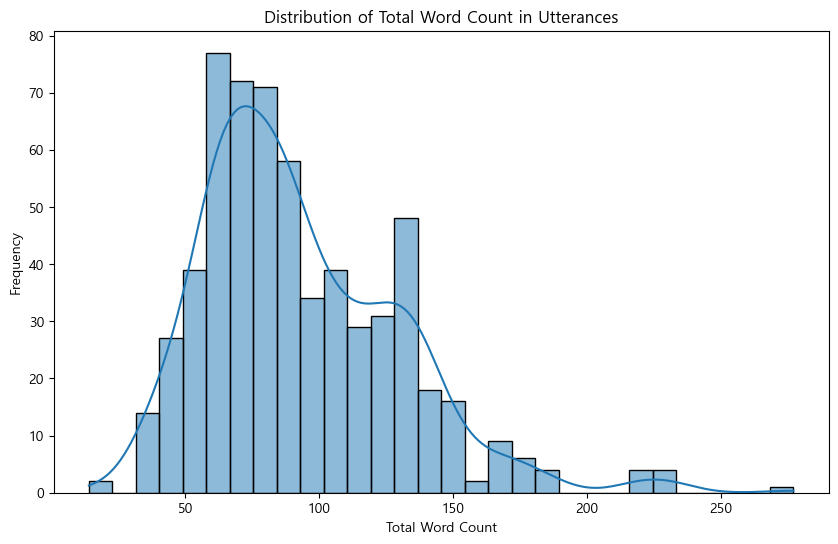

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 발화의 단어 수 계산
df['total_word_count'] = df['input'].apply(lambda x: sum([len(str(utter['utterance']).split()) for utter in x['conversation']]))

print("\n발화의 단어 수 분포:")
print(df['total_word_count'].describe())

# 단어 수 분포 히스토그램 시각화 및 저장
plt.figure(figsize=(10, 6))
sns.histplot(df['total_word_count'], kde=True, bins=30)
plt.title('Distribution of Total Word Count in Utterances')
plt.xlabel('Total Word Count')
plt.ylabel('Frequency')
plt.savefig('test_word_count_distribution.png')
plt.show()



대화 내 발화 길이 변화:
0    [-3, -10, -2, 3, 6, -9, 7, -1, -5, 6, 6, 2, -1...
1    [-3, -10, -2, 3, 6, -9, 7, -1, -5, 6, 6, 2, -1...
2    [-3, -10, -2, 3, 6, -9, 7, -1, -5, 6, 6, 2, -1...
3    [-3, -10, -2, 3, 6, -9, 7, -1, -5, 6, 6, 2, -1...
4    [-3, -10, -2, 3, 6, -9, 7, -1, -5, 6, 6, 2, -1...
Name: utterance_diff, dtype: object


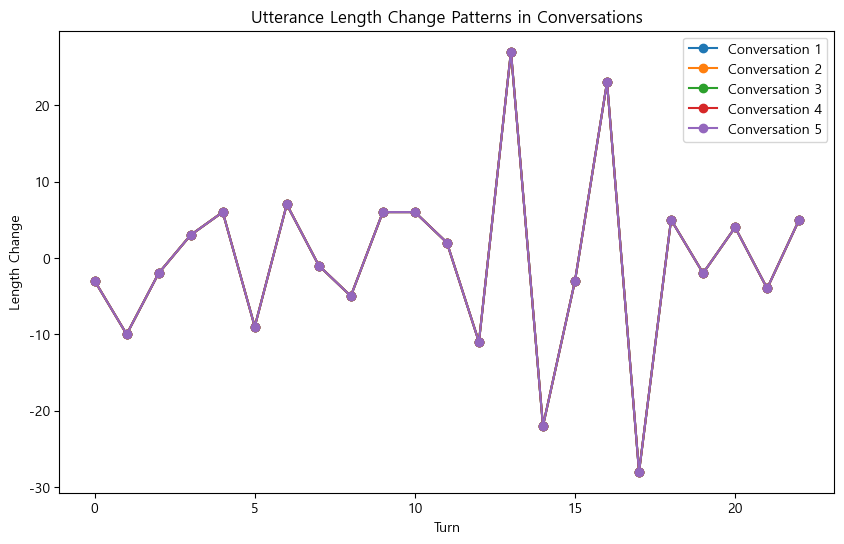

In [44]:
import matplotlib.pyplot as plt

# 발화 길이 변화 패턴 분석
df['utterance_lengths'] = df['input'].apply(lambda x: [len(str(utter['utterance'])) for utter in x['conversation']])
df['utterance_diff'] = df['utterance_lengths'].apply(lambda x: [j-i for i, j in zip(x[:-1], x[1:])])

print("\n대화 내 발화 길이 변화:")
print(df['utterance_diff'].head())

# 발화 길이 변화 패턴 시각화 및 저장
plt.figure(figsize=(10, 6))
for i in range(min(5, len(df))):
    plt.plot(df['utterance_diff'].iloc[i], marker='o', label=f'Conversation {i+1}')
plt.title('Utterance Length Change Patterns in Conversations')
plt.xlabel('Turn')
plt.ylabel('Length Change')
plt.legend()
plt.savefig('test_utterance_length_change_patterns.png')
plt.show()



발화 내용에서 자주 등장하는 단어 분석:
   Word  Frequency
0    ㅎㅎ        417
1    저는        379
2    너무        337
3     아        320
4    진짜        304
5    저도        302
6     것        279
7   맞아요        258
8     네        257
9    ㅋㅋ        237
10    좀        226
11  ㅋㅋㅋ        214
12    다        212
13    잘        203
14    전        200
15   근데        192
16    그        185
17  같아요        184
18   많이        176
19    더        172


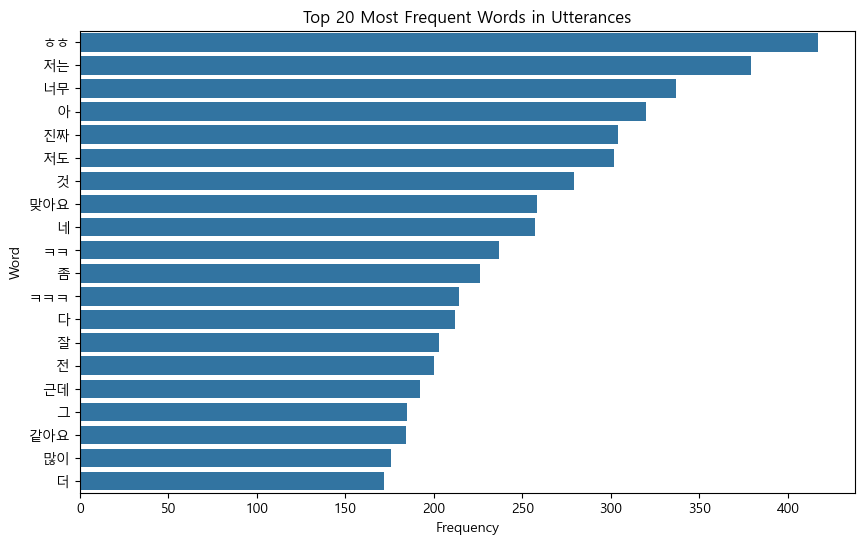

In [45]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def word_frequency(text, num_words=10):
    words = text.split()
    word_counts = Counter(words)
    common_words = word_counts.most_common(num_words)
    return pd.DataFrame(common_words, columns=['Word', 'Frequency'])

print("\n발화 내용에서 자주 등장하는 단어 분석:")
common_words_df = word_frequency(all_text, num_words=20)
print(common_words_df)

# 자주 등장하는 단어 시각화 및 저장
plt.figure(figsize=(10, 6))
sns.barplot(data=common_words_df, x='Frequency', y='Word')
plt.title('Top 20 Most Frequent Words in Utterances')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.savefig('test_top_frequent_words.png')
plt.show()
